<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS2: Primeros pasos en la simulación
#### Pablo Romero


# Introducción
Se realizó la DFT y la FFT de una señal senoidal.



In [1]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################

vmax=1          #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
ff=1           #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=16         #Muestras del ADC
fs=16       #Frecuencia de muestreio del ADC [Hz]         
# Ts=1/Fs
delta_f=fs/nn


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt = np.arange(0.0, nn/fs, 1/fs)
    xx = (np.sin(2*np.pi*ff*tt+ph))*vmax + dc
    return tt,xx

def W_twiddle(k,n,N):
    
    result=0
    result = np.round(np.cos(2*np.pi*k*n/N), 4)
    result -= np.round(np.sin(2*np.pi*k*n/N)*1j, 4)
    
    return result

def DFT (xx):
    
    nn = np.size(xx)
    temp= np.zeros((nn,nn))
    temp= temp.astype(complex)
    
    XX = np.zeros(nn)
    XX = XX.astype(complex)
       
    for k in range(nn):
        for n in range(nn):
           temp[k][n] = xx[n]*W_twiddle(k,n,nn)
           XX[k]+=temp[k][n]
           
       
    return np.round(XX,5)




        

Calculamos DFT y FFT del Sen()

In [2]:
Signal0 = mi_funcion_sen(vmax, dc, ff, ph*0, nn, fs)

XX_DFT = DFT(Signal0[1])

XX_FFT= np.fft.fft(Signal0[1])

XX_df= np.arange(0.0, fs, delta_f)


Señal senoidal

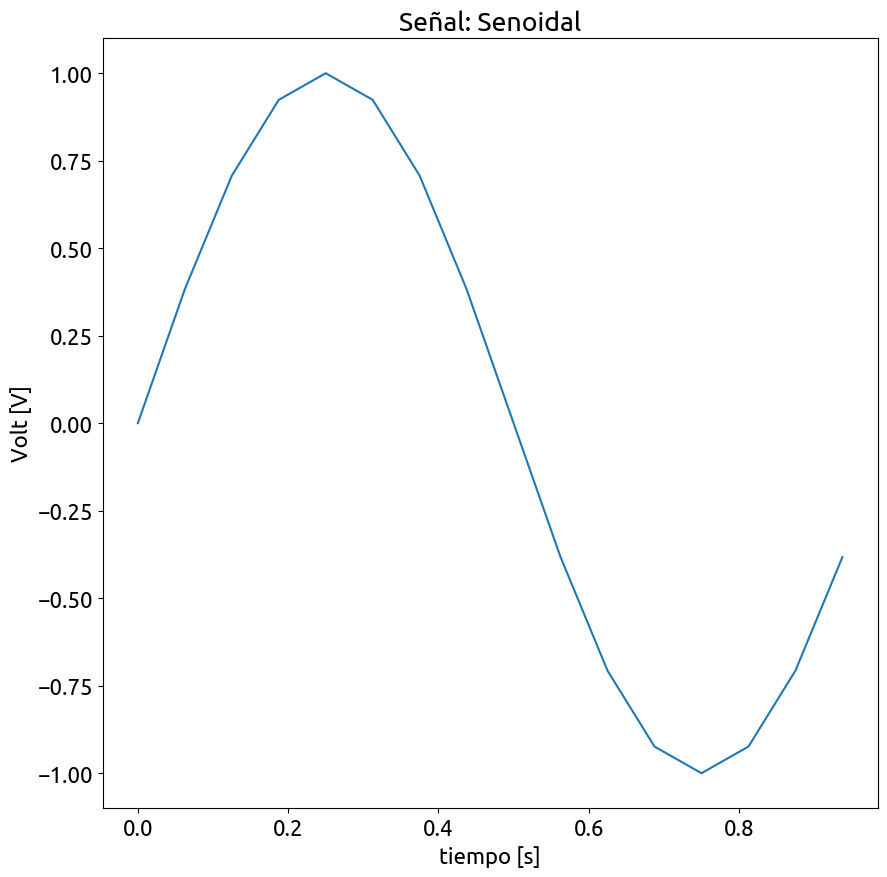

In [3]:
plt.figure(1)
# plt.clf()
plt.plot(Signal0[0], Signal0[1])
plt.title('Señal: Senoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.show() 

Graficamos el modulo de la DFT

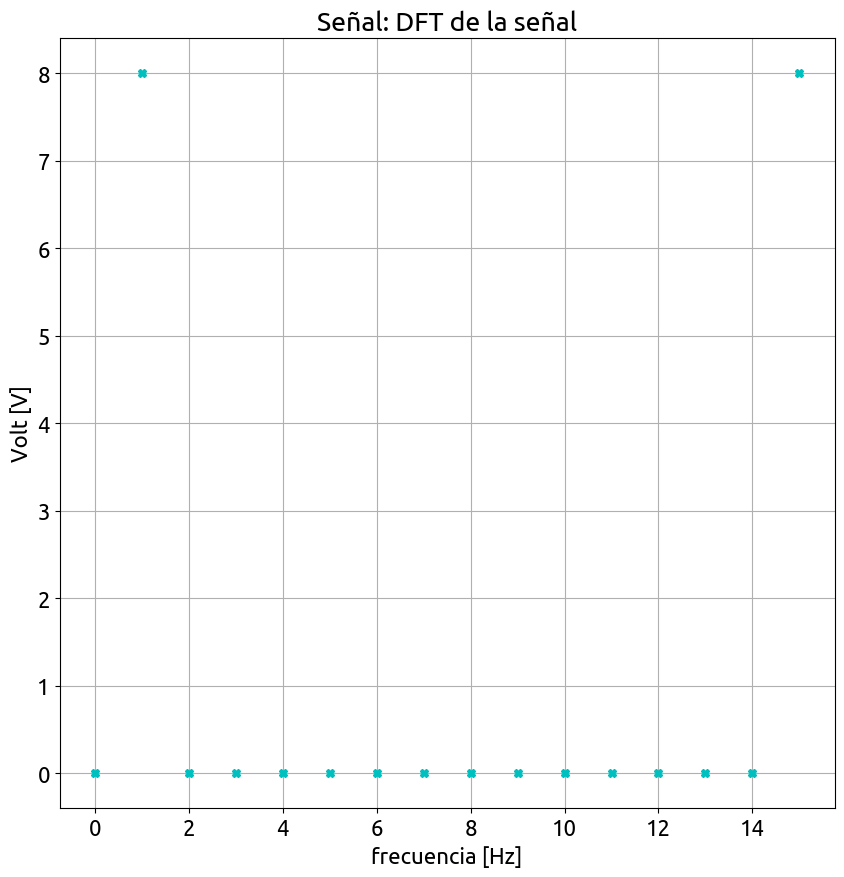

In [4]:
plt.figure(2)
# plt.clf()
plt.plot(XX_df,np.absolute(XX_DFT), 'cX')
plt.title('Señal: DFT de la señal')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.grid(which='both', axis='both')
plt.show()

Graficamos el modulo de la FFT

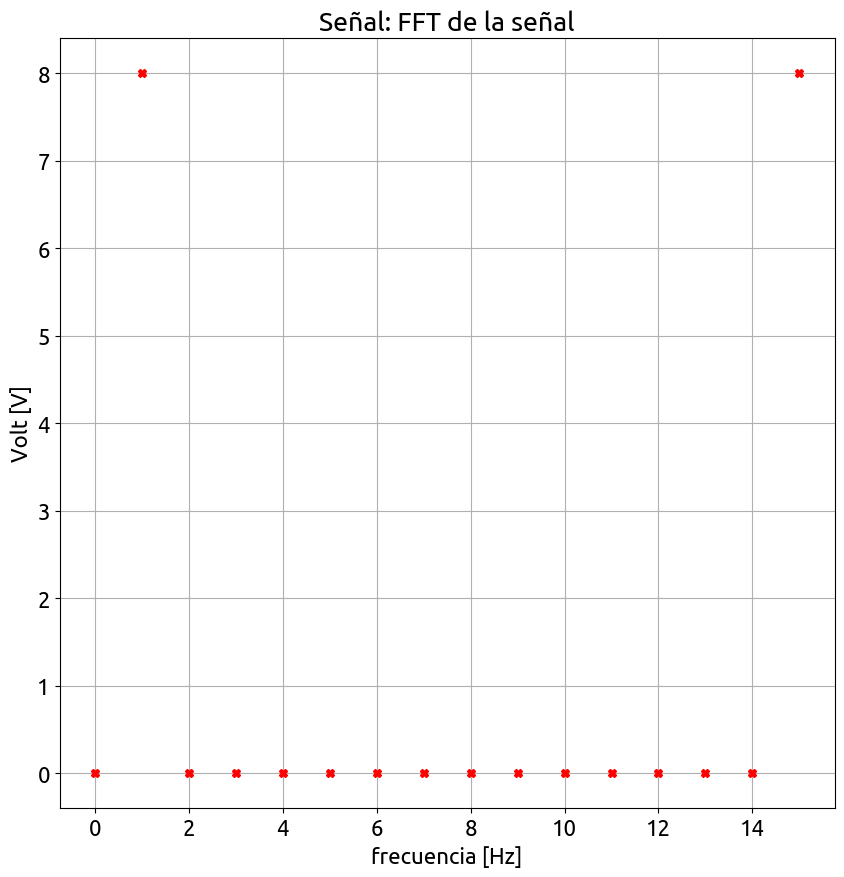

In [5]:
plt.figure(3)
# plt.clf()
plt.plot(XX_df,np.absolute(XX_FFT), 'rX')
plt.title('Señal: FFT de la señal')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.grid(which='both', axis='both')
plt.show()


Fin del documento